In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = "csv/raw.csv"


df = pd.read_csv(data,header=None)

In [33]:
clean = "clean_cpih.csv"
clean_df = pd.read_csv(clean)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,4,NaN,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024,2024,2025,2025,2025
1,5,NaN,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar
2,24,01.1.1 Bread and cereals,136.4,136.5,136.9,135.6,136,135.8,136.4,136,136.1,137.3,138.3,138.9,140,140.5
3,25,01.1.1.1 Rice,115.7,117.5,116.5,115.8,116.3,115.4,115.4,113.8,115,114.2,114.2,114,113.7,112
4,26,01.1.1.2 Flours and other cereals,106.2,106.3,106.2,106.3,106.1,106.1,106.2,106.1,105.9,106.1,106.4,106.5,107.6,106.8


In [3]:
# Set first row as header
df.columns = df.iloc[0]  # Set row 0 as header
df = df[1:]    

In [4]:
# Combine the original header row (like "2024") with first data row (like "Feb")
fixed_cols = ['Category'] + [f"{col} {df.iloc[0, i]}" for i, col in enumerate(df.columns[1:], start=1)]
df.columns = fixed_cols

# Drop that first row which I used to build the real headers
df = df.iloc[1:].reset_index(drop=True)

In [5]:
# Drop the first column (the old Excel index)
df = df.drop(columns=['Category'])

In [6]:
# Rename the now-second column to 'Product'
df = df.rename(columns={df.columns[0]: 'Product'})


In [7]:
# Remove numeric codes like '01.1.1.7/8' or '01.1.2' with dots/slashes
df['Product'] = df['Product'].str.replace(r'^\s*\d+(\.\d+)*(\/\d+)*\s*', '', regex=True)

In [8]:
# Tidy any trailing/leading spaces
df['Product'] = df['Product'].str.strip()

In [24]:
df.head()

,Product,2024 Feb,2024 Mar,2024 Apr,2024 May,2024 Jun,2024 Jul,2024 Aug,2024 Sep,2024 Oct,2024 Nov,2024 Dec,2025 Jan,2025 Feb,2025 Mar
0,Bread and cereals,136.4,136.5,136.9,135.6,136,135.8,136.4,136,136.1,137.3,138.3,138.9,140,140.5
1,Rice,115.7,117.5,116.5,115.8,116.3,115.4,115.4,113.8,115,114.2,114.2,114,113.7,112
2,Flours and other cereals,106.2,106.3,106.2,106.3,106.1,106.1,106.2,106.1,105.9,106.1,106.4,106.5,107.6,106.8
3,Bread,135.9,135.4,135.5,135.8,136.1,135.5,136.3,136.4,136.3,136,136.9,137.3,137.3,136.2
4,Other bakery products,150.6,151.3,150.8,149.3,149,149.6,149.8,149.3,150.1,152.3,155.1,155.8,157.8,160.8


In [ ]:
# Save cleaned CPIH food inflation dataset to CSV
#df.to_csv("clean_cpih.csv", index=False)

In [16]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import timedelta

In [19]:
!pip install pmdarima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - -------------------------------------- 30.7/614.7 kB 1.3 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/614.7 kB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 6.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.6/2.8 MB 17.5 MB/s eta 0:00:01
   ------------------- -------------------- 1.4/2.8 MB 17.3 MB/s eta 0:00:01
   -------------------- ------------------- 1.4/2.8 MB 15.1 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 9.2 MB/s eta 0:00:01
   ----------------------------------- ---- 2.5/2.8 MB 12.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 11.8 MB/s eta 0:00:00


In [20]:
from pmdarima import auto_arima

In [21]:
df_melted = df.melt(id_vars="Product", var_name="Date", value_name="Index")
df_melted["Date"] = pd.to_datetime(df_melted["Date"], format="%Y %b")

# Choose a product
product = "Bread and cereals"
ts = df_melted[df_melted["Product"] == product].copy()
ts = ts.set_index("Date").sort_index()

In [23]:
print(ts["Index"])
print(ts["Index"].isna().sum()) 

Date
2024-02-01    136.4
2024-03-01    136.5
2024-04-01    136.9
2024-05-01    135.6
2024-06-01      136
2024-07-01    135.8
2024-08-01    136.4
2024-09-01      136
2024-10-01    136.1
2024-11-01    137.3
2024-12-01    138.3
2025-01-01    138.9
2025-02-01      140
2025-03-01    140.5
Name: Index, dtype: object
0


In [25]:
ts["Index"] = ts["Index"].astype(float)

In [28]:
print(ts["Index"].head(15))
print(ts["Index"].dtype)
print(ts["Index"].isna().sum())

Date
2024-02-01    136.4
2024-03-01    136.5
2024-04-01    136.9
2024-05-01    135.6
2024-06-01    136.0
2024-07-01    135.8
2024-08-01    136.4
2024-09-01    136.0
2024-10-01    136.1
2024-11-01    137.3
2024-12-01    138.3
2025-01-01    138.9
2025-02-01    140.0
2025-03-01    140.5
Name: Index, dtype: float64
float64
0


In [29]:
model = auto_arima(
    ts["Index"],
    seasonal=False,      # ✅ Don’t use seasonality — data too short for m=12
    trace=True,
    suppress_warnings=True
)

# Forecast next 6 months
n_periods = 6
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Build forecast dates
future_dates = pd.date_range(ts.index[-1] + pd.DateOffset(months=1), periods=n_periods, freq='MS')
forecast_df = pd.DataFrame({
    "Date": future_dates,
    "Forecast": forecast,
    "Lower": conf_int[:, 0],
    "Upper": conf_int[:, 1]
})

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=50.151, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=179.531, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=47.670, Time=0.10 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=46.807, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=49.193, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 0.861 seconds


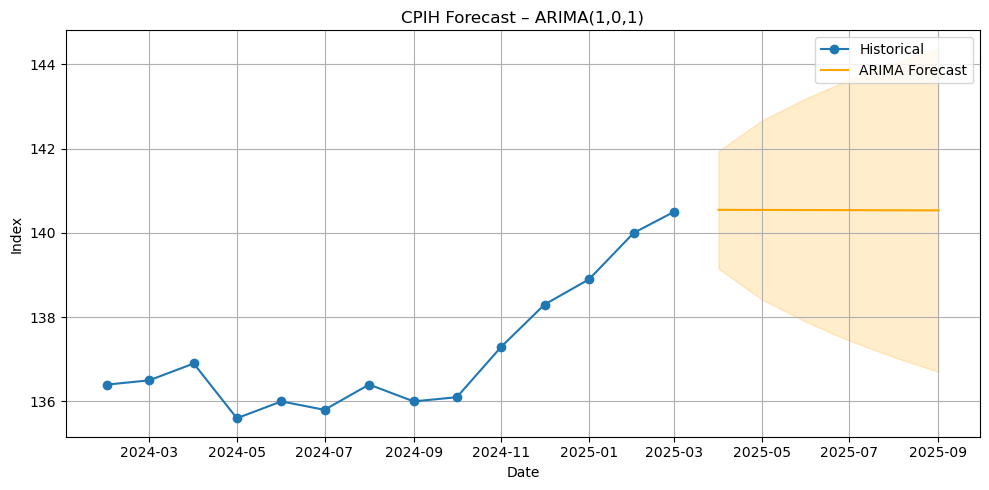

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(ts.index, ts["Index"], label="Historical", marker="o")
plt.plot(forecast_df["Date"], forecast_df["Forecast"], label="ARIMA Forecast", color="orange")
plt.fill_between(forecast_df["Date"], forecast_df["Lower"], forecast_df["Upper"], color="orange", alpha=0.2)
plt.title("CPIH Forecast – ARIMA(1,0,1)")
plt.xlabel("Date")
plt.ylabel("Index")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [35]:
# Melt into long format
df_melted = clean_df.melt(id_vars="Product", var_name="Date", value_name="Index")
df_melted["Date"] = pd.to_datetime(df_melted["Date"], format="%Y %b", errors="coerce")
df_melted["Index"] = pd.to_numeric(df_melted["Index"], errors="coerce")
df_melted = df_melted.dropna()

# Container for all forecasts
forecast_results = []

# Forecast next 6 months for each product
for product in df_melted["Product"].unique():
    ts = df_melted[df_melted["Product"] == product].copy()
    ts = ts.set_index("Date").sort_index()

    if len(ts) < 12:
        continue

    try:
        model = auto_arima(ts["Index"], seasonal=False, suppress_warnings=True)
        forecast, conf_int = model.predict(n_periods=6, return_conf_int=True)
        future_dates = pd.date_range(ts.index[-1] + pd.DateOffset(months=1), periods=6, freq='MS')

        forecast_df = pd.DataFrame({
            "Product": product,
            "Date": future_dates,
            "Forecast": forecast,
            "Lower": conf_int[:, 0],
            "Upper": conf_int[:, 1]
        })

        forecast_results.append(forecast_df)
    except Exception as e:
        print(f"Skipping {product} due to error: {e}")

# Combine and export
all_forecasts = pd.concat(forecast_results, ignore_index=True)
all_forecasts.to_csv("arima_forecast_all_products.csv", index=False)

c:\Users\Entwan\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(2,0,2)(0,0,0)[0] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\Entwan\anaconda3\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\Entwan\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\Entwan\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "c:\Users\Entwan\anaconda3\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "c:\Users\Entwan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\mlemodel.py", line 704, in fit
    mlefi